In [ ]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign


 99% 321M/325M [00:09<00:00, 39.3MB/s]
100% 325M/325M [00:09<00:00, 35.2MB/s]


In [ ]:
!unzip /content/skin-cancer-malignant-vs-benign.zip -d /content/skin_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/skin_dataset/data/train/benign/420.jpg  
  inflating: /content/skin_dataset/data/train/benign/421.jpg  
  inflating: /content/skin_dataset/data/train/benign/422.jpg  
  inflating: /content/skin_dataset/data/train/benign/423.jpg  
  inflating: /content/skin_dataset/data/train/benign/424.jpg  
  inflating: /content/skin_dataset/data/train/benign/425.jpg  
  inflating: /content/skin_dataset/data/train/benign/426.jpg  
  inflating: /content/skin_dataset/data/train/benign/429.jpg  
  inflating: /content/skin_dataset/data/train/benign/43.jpg  
  inflating: /content/skin_dataset/data/train/benign/430.jpg  
  inflating: /content/skin_dataset/data/train/benign/431.jpg  
  inflating: /content/skin_dataset/data/train/benign/432.jpg  
  inflating: /content/skin_dataset/data/train/benign/434.jpg  
  inflating: /content/skin_dataset/data/train/benign/435.jpg  
  inflating: /content/skin_dataset/data/train/benign/438.jpg  
  inf

In [ ]:
import os 
path = '/content/skin_dataset/train'
directory_contents = os.listdir(path)
print(directory_contents)


['malignant', 'benign']


In [ ]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 642 kB 34.3 MB/s 
     |████████████████████████████████| 840 kB 59.7 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 10.9 MB 67.8 MB/s 
     |████████████████████████████████| 1.1 MB 31.4 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 237 kB 75.9 MB/s 
     |████████████████████████████████| 1.2 MB 53.7 MB/s 
     |████████████████████████████████| 6.4 MB 54.8 MB/s 
     |████████████████████████████████| 120 kB 78.9 MB/s 
     |████████████████████████████████| 3.4 MB 54.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 352 kB 63.5 MB/s 
     |████████████████████████████████| 99 kB 9.7 MB/s 
     |████████████████████████████████| 47.8 MB 50 kB/s 
     |██████████████

In [ ]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt

In [ ]:
image_path='/content/skin_dataset/train'
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 2637, num_label: 2, labels: benign, malignant.


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)
#model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


65/65 [==============================] - 24s 166ms/step - loss: 0.6437 - accuracy: 0.7524 - val_loss: 0.4565 - val_accuracy: 0.8409
Epoch 2/5
65/65 [==============================] - 8s 121ms/step - loss: 0.6217 - accuracy: 0.7947 - val_loss: 0.4814 - val_accuracy: 0.8258
Epoch 3/5
65/65 [==============================] - 8s 120ms/step - loss: 0.6018 - accuracy: 0.7990 - val_loss: 0.5348 - val_accuracy: 0.8409
Epoch 4/5
65/65 [==============================] - 8s 121ms/step - loss: 0.5543 - accuracy: 0.8188 - val_loss: 0.4654 - val_accuracy: 0.8333
Epoch 5/5
65/65 [==============================] - 8s 121ms/step - loss: 0.5256 - accuracy: 0.8173 - val_loss: 0.4857 - val_accuracy: 0.8371


In [ ]:
loss, accuracy = model.evaluate(test_data)

9/9 [==============================] - 2s 72ms/step - loss: 0.5096 - accuracy: 0.8447


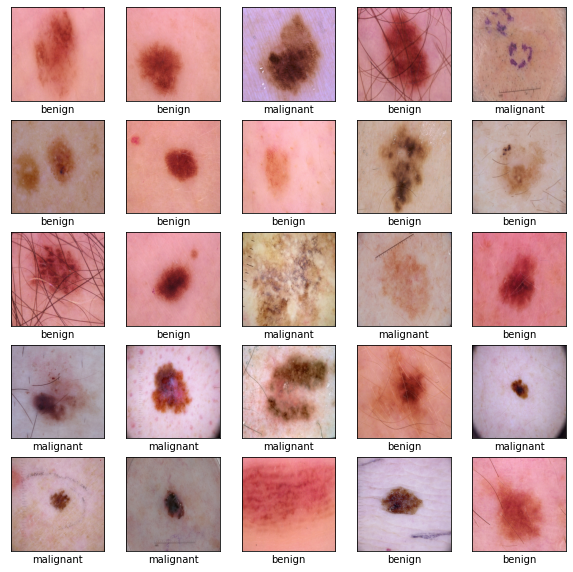

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

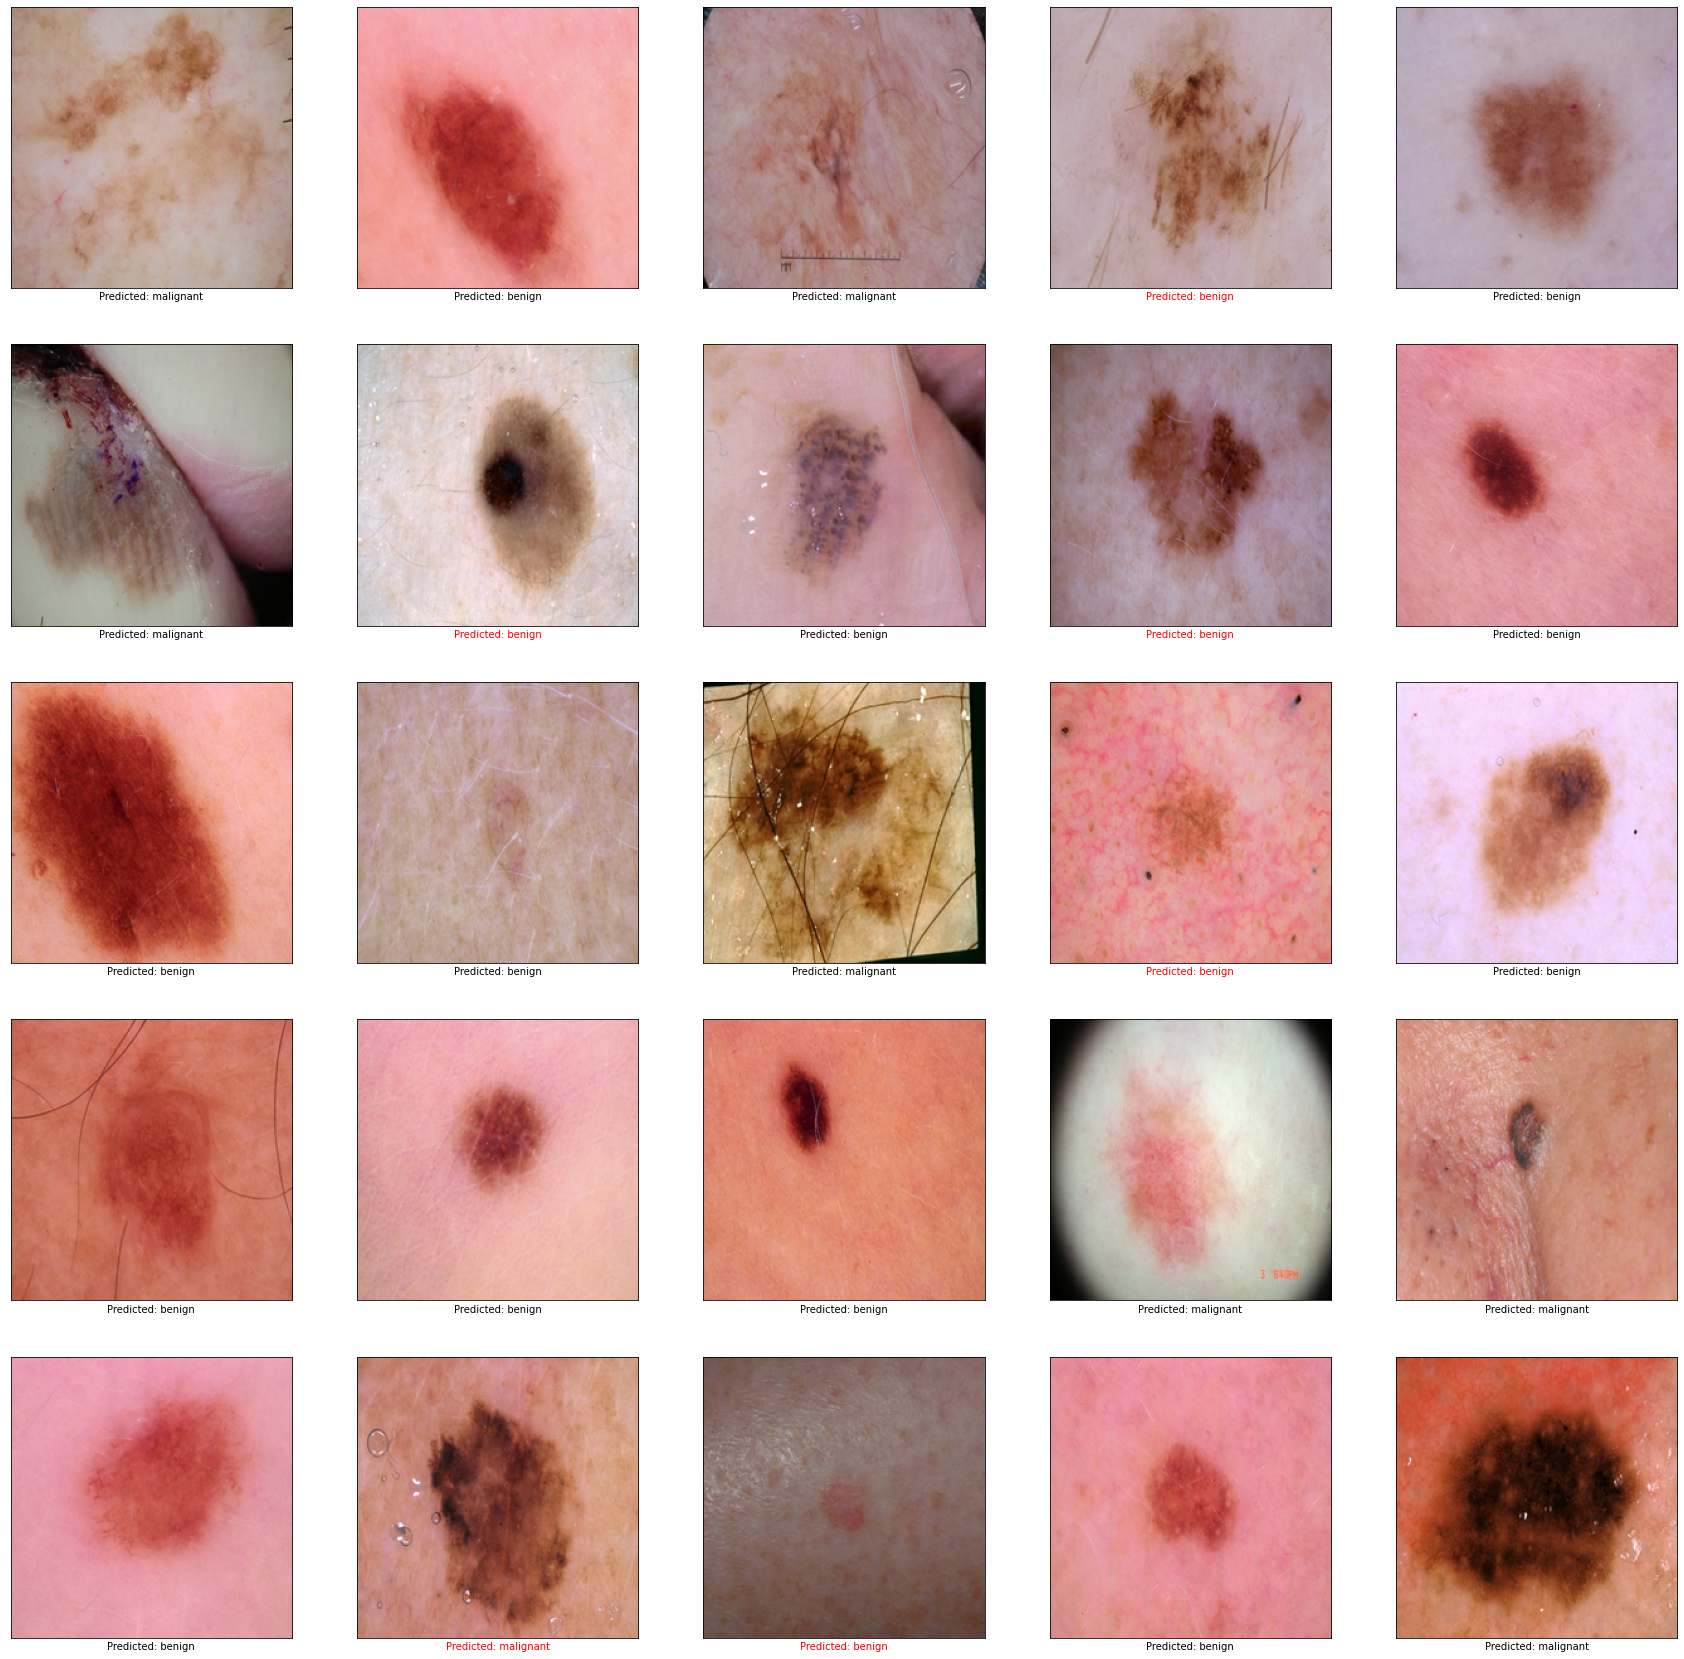

In [ ]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/model16', export_format=ExportFormat.LABEL)
config = QuantizationConfig.for_float16()
model.export(export_dir='/content/model16', tflite_filename='model_skin_cancer.tflite', quantization_config=config)


INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Assets written to: /tmp/tmp5cp71zfd/assets


INFO:tensorflow:Assets written to: /tmp/tmp5cp71zfd/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpawst5ur0/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpawst5ur0/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_skin_cancer.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_skin_cancer.tflite
